    Dataste ---------->  Image Processing  ----------> Train|Test split ----------> Neural Network
                  
                                      TRAINED NEURAL NETWORK
                  
    New Image ----------> Neural Network ---------> Handwriiten Digit Prediction

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from cv2 import imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [74]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [75]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [76]:
type(X_train)

numpy.ndarray

In [77]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [78]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

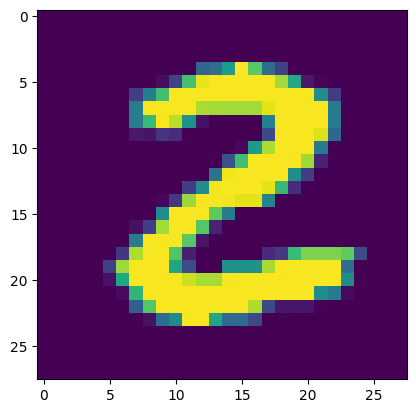

2


In [79]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [80]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [81]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [82]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [83]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [84]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [85]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9116
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1427 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0703 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9864
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

In [87]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9721
0.972100019454956


In [88]:
print(X_test.shape)

(10000, 28, 28)


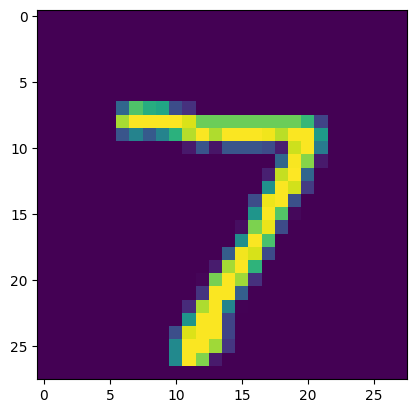

In [89]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [90]:
print(Y_test[0])

7


In [91]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [92]:
print(Y_pred.shape)

(10000, 10)


In [93]:
print(Y_pred[0])

[1.4470381e-03 5.1502528e-04 3.9092222e-01 6.9409943e-01 1.5625765e-06
 4.2258758e-02 7.7306277e-09 9.9999446e-01 1.6882188e-04 1.6295108e-01]


In [94]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [95]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [96]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [97]:
print(conf_mat)

tf.Tensor(
[[ 961    0    3    0    0    2    4    3    6    1]
 [   0 1117    3    4    0    1    1    1    7    1]
 [   1    0 1003    6    5    0    2    4   10    1]
 [   1    0    0  994    1    6    0    4    4    0]
 [   0    0    2    0  955    1    2    2    1   19]
 [   2    0    0   15    4  859    4    1    4    3]
 [   6    3    2    1    5    4  931    0    6    0]
 [   0    5   12   10    3    0    1  989    1    7]
 [   1    0    2   13    8    4    0    3  940    3]
 [   1    2    0    4   21    3    1    4    1  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

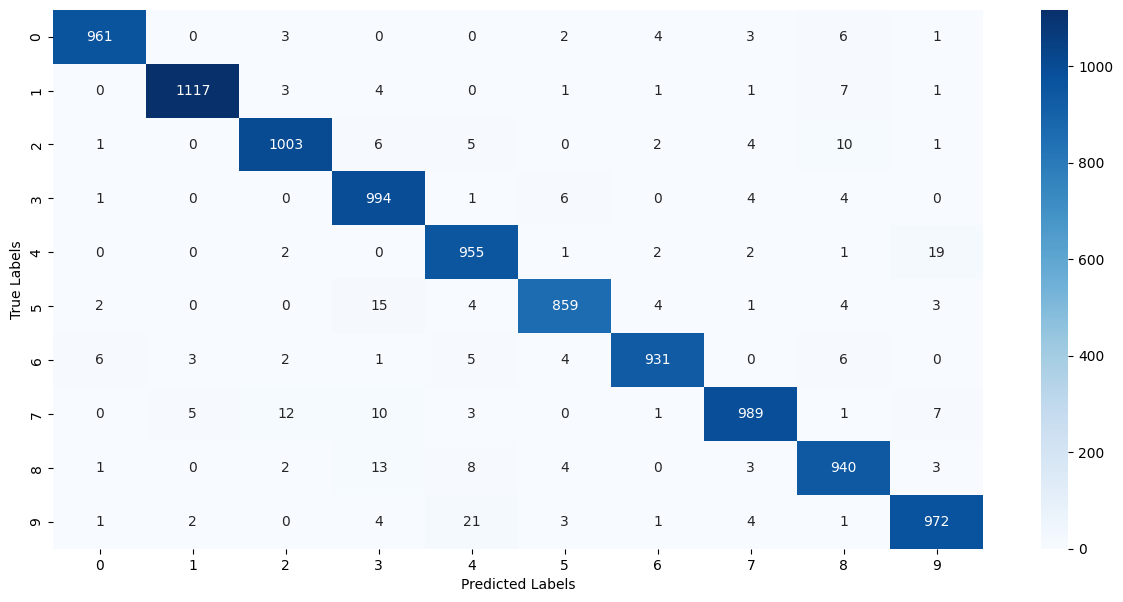

In [98]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [99]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [100]:
type(input_image)

numpy.ndarray

In [101]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [102]:
imshow('',input_image)

In [103]:
input_image.shape

(318, 318, 3)

In [104]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [105]:
grayscale.shape

(318, 318)

In [106]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [107]:
input_image_resize.shape

(28, 28)

In [54]:
imshow('',input_image_resize)

In [55]:
input_image_resize = input_image_resize/255

In [56]:
type(input_image_resize)

numpy.ndarray

In [57]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [58]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[3.38019272e-13 1.51072545e-02 8.55754188e-05 1.00000000e+00
  1.19616832e-14 5.78789771e-01 7.69839023e-16 2.05682387e-04
  3.67650995e-03 1.32291347e-01]]


In [59]:
input_pred_label = np.argmax(input_prediction)

In [60]:
print(input_pred_label)

3


In [65]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

imshow("",input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: MNIST_digit7.png
1/1 [==============================] - 0s 26ms/step
The Handwritten Digit is recognised as  7
